# Importing  Necessary Libraries

In [1]:
import pandas as pd
from pathlib import Path
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Creating the Class for Email Slicer

In [2]:
class EmailManager:
    
    def __init__(self, data_path):
        self.data_path = Path(data_path)
        self.emails = {}

# Function to add different parts of Email

In [3]:
class EmailManager:
    
    def add_email(self, email_id, email_subject, email_date, email_time, folder):
        self.emails[email_id] = {'Subject': email_subject, 'Date': email_date, 'Time': email_time, 'Folder': folder}

# Function to Save Email to a CSV File

In [4]:
class EmailManager: 
    
    def save_emails(self):
        try:
            self.data_path.mkdir(parents=True, exist_ok=True)

            folder_files = {}
            
            for folder, emails in self.group_emails_by_folder().items():
                folder_path = self.data_path / folder
                folder_path.mkdir(parents=True, exist_ok=True)

                file_name = folder + "_emails.csv"
                file_path = folder_path / file_name

                df = pd.DataFrame(emails)
                df.to_csv(file_path, index=False)

                folder_files[folder] = file_path

            # Merge CSV files into a single file
            merged_df = pd.concat(pd.read_csv(file) for file in folder_files.values())
            merged_file_path = self.data_path / "email_data.csv"
            merged_df.to_csv(merged_file_path, index=False)

            return merged_df

        except Exception as e:
            print("An error occurred:", str(e))


# Function to Group Emails by Different Folders

In [5]:
class EmailManager:   
    
    def group_emails_by_folder(self):
        grouped_emails = {}
        for email_id, email_data in self.emails.items():
            folder = email_data['Folder']
            
            if folder in grouped_emails:
                grouped_emails[folder].append({
                    'EmailID': email_id,
                    'Subject': email_data['Subject'],
                    'Date': email_data['Date'],
                    'Time': email_data['Time']
                })
            
            else:
                
                grouped_emails[folder] = [{
                    'EmailID': email_id,
                    'Subject': email_data['Subject'],
                    'Date': email_data['Date'],
                    'Time': email_data['Time']
                }]
        
        return grouped_emails

# Usage Example

In [6]:
#defining the EmailManager class once again for usage example

class EmailManager:
    
    def __init__(self, data_path):
        self.data_path = Path(data_path)
        self.emails = {}

    def add_email(self, email_id, email_subject, email_date, email_time, folder):
        self.emails[email_id] = {
            'Subject': email_subject,
            'Date': email_date,
            'Time': email_time,
            'Folder': folder
        }

    def save_emails(self):
        try:
            self.data_path.mkdir(parents=True, exist_ok=True)

            folder_files = {}
            for folder, emails in self.group_emails_by_folder().items():
                folder_path = self.data_path / folder
                folder_path.mkdir(parents=True, exist_ok=True)

                file_name = folder + "_emails.csv"
                file_path = folder_path / file_name

                df = pd.DataFrame(emails)
                df.to_csv(file_path, index=False)

                folder_files[folder] = file_path

            # Merge CSV files into a single file
            merged_df = pd.concat(pd.read_csv(file) for file in folder_files.values())
            merged_file_path = self.data_path / "email_data.csv"
            merged_df.to_csv(merged_file_path, index=False)

            return merged_df

        except Exception as e:
            print("An error occurred:", str(e))

    def group_emails_by_folder(self):
        grouped_emails = {}
        for email_id, email_data in self.emails.items():
            folder = email_data['Folder']
            if folder in grouped_emails:
                grouped_emails[folder].append({
                    'EmailID': email_id,
                    'Subject': email_data['Subject'],
                    'Date': email_data['Date'],
                    'Time': email_data['Time']
                })
            else:
                grouped_emails[folder] = [{
                    'EmailID': email_id,
                    'Subject': email_data['Subject'],
                    'Date': email_data['Date'],
                    'Time': email_data['Time']
                }]
        return grouped_emails

    
#Usage Example

if __name__ == "__main__":
    warnings.simplefilter(action='ignore', category=FutureWarning)

    try:
        data_path = "C:/Users/DEBANIK DEB/Desktop/DS Courseworks/Programming/Python Programming/Email Slicer Project"
        manager = EmailManager(data_path=data_path)
        print("Please enter the necessary details of the Emails below.")

        while True:
            folder = input("Enter the folder name (inbox, spam, important, social, starred): ")

            while True:
                email_id = input("Enter the email ID: ")
                email_subject = input("Enter the email subject: ")
                email_date = input("Enter the email date: ")
                email_time = input("Enter the email time: ")

                manager.add_email(email_id, email_subject, email_date, email_time, folder)

                choice = input("Do you want to add another email? (yes/no): ")
                if choice.lower() == "no":
                    print("Thank you for entering the Emails.")
                    break

            folder_choice = input("Do you want to enter another folder? (yes/no): ")
            if folder_choice.lower() == "no":
                break

        merged_df = manager.save_emails()

        if merged_df is not None:
            print(merged_df.head())

    except Exception as e:
        print("An error occurred:", str(e))

    finally:
        print("Emails saved successfully!")

print("Email Slicing Operation is done.")


Please enter the necessary details of the Emails below.
Enter the folder name (inbox, spam, important, social, starred): 
Enter the email ID: debanik.dev@gmail.com
Enter the email subject: kkk
Enter the email date: 12/4/23
Enter the email time: 4:05 am
Do you want to add another email? (yes/no): yes
Enter the email ID: ll
Enter the email subject: kk
Enter the email date: 4/5/23
Enter the email time: 2:02 am
Do you want to add another email? (yes/no): no
Thank you for entering the Emails.
Do you want to enter another folder? (yes/no): no
                 EmailID Subject     Date     Time
0  debanik.dev@gmail.com     kkk  12/4/23  4:05 am
1                     ll      kk   4/5/23  2:02 am
Emails saved successfully!
Email Slicing Operation is done.


# The New Dataset

In [7]:
merged_df

,EmailID,Subject,Date,Time
0,debanik.dev@gmail.com,kkk,12/4/23,4:05 am
1,ll,kk,4/5/23,2:02 am


In [8]:
merged_df.shape

(2, 4)

In [9]:
merged_df.columns

Index(['EmailID', 'Subject', 'Date', 'Time'], dtype='object')

# Countplot of Date & Email IDs

<AxesSubplot:xlabel='Date', ylabel='count'>

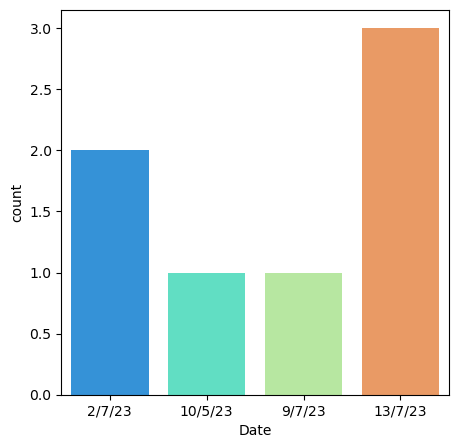

In [24]:
plt.figure(figsize = (5,5))
sns.countplot(x= "Date" ,data= merged_df, palette= "rainbow")

<AxesSubplot:xlabel='count', ylabel='EmailID'>

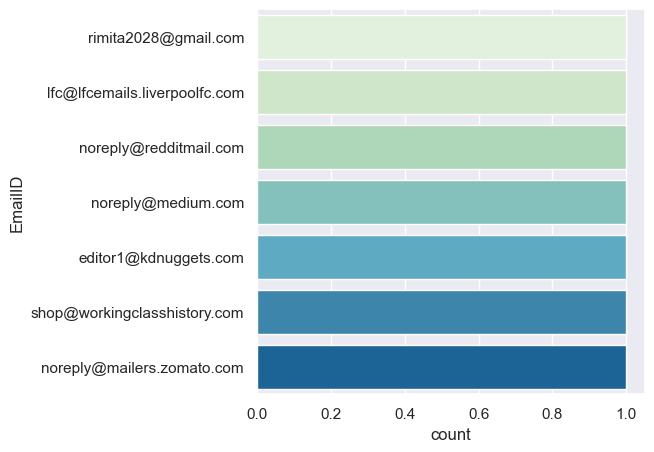

In [48]:
plt.figure(figsize = (5,5))
sns.countplot(y= "EmailID" ,data= merged_df, palette= "GnBu")